# KDD
The KDD process consists of five primary steps:

**Selection**: Identifying and selecting the dataset relevant to the task.

**Preprocessing**: Cleaning and preparing the data.

**Transformation**: Transforming the data into a suitable format for analysis.

**Data Mining**: Applying algorithms to discover patterns.

**Interpretation and Evaluation**: Evaluating and interpreting the results.

Step 1: Selection

The first step in the KDD process is to select the dataset. Let's use a Kaggle dataset for demonstration. We'll select the "Titanic - Machine Learning from Disaster" dataset, which contains passenger details from the Titanic disaster, including whether they survived or not. This dataset is widely used for educational purposes and offers a good mix of categorical and numerical data.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the Titanic dataset from Kaggle (assuming it's already downloaded to Google Colab)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 2: Preprocessing**

In [2]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()

# Display missing data summary
print("Missing Data in Each Column:\n", missing_data)

# Handle missing values: Fill missing Age with median, Cabin with 'Unknown', and Embarked with most common value
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns: 'PassengerId', 'Name', and 'Ticket' (they are not useful for survival prediction)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Confirm there are no more missing values
print("\nData after handling missing values:\n", df.isnull().sum())

# Display the first few rows after preprocessing
df.head()


Missing Data in Each Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data after handling missing values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


**Step 3: Transformation**

In [3]:
# Importing necessary libraries for transformation
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-Hot Encoding for categorical variables: 'Sex', 'Embarked', and 'Pclass'
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Scaling numerical features: 'Age', 'Fare'
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Display the transformed dataset
df.head()


,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,-0.565736,1,0,-0.502445,Unknown,True,False,True,False,True
1,1,0.663861,1,0,0.786845,C85,False,False,False,False,False
2,1,-0.258337,0,0,-0.488854,Unknown,False,False,True,False,True
3,1,0.433312,1,0,0.420730,C123,False,False,True,False,False
4,0,0.433312,0,0,-0.486337,Unknown,True,False,True,False,True


**Step 4: Data Mining**

In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features (X) and target (y)
X = df.drop(columns=['Survived', 'Cabin'])
y = df['Survived']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.7989

Confusion Matrix:
 [[90 15]
 [21 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [5]:
# Import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display evaluation results for Random Forest model
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.8101

Random Forest Confusion Matrix:
 [[90 15]
 [19 55]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**visualizations**

1. Survival Count Plot

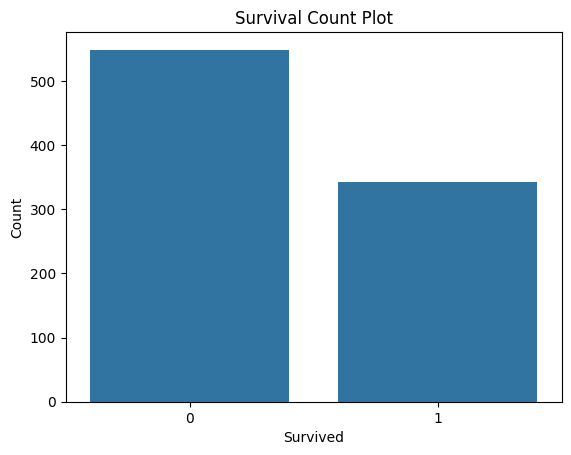

In [7]:
# Plot survival counts
sns.countplot(x='Survived', data=df)
plt.title('Survival Count Plot')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()



2. Confusion Matrix Heatmap

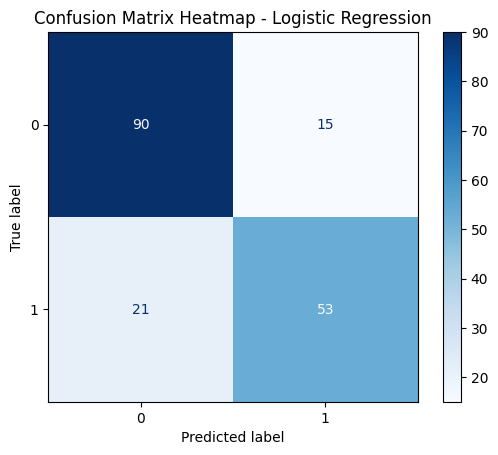

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix as heatmap
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix Heatmap - Logistic Regression')
plt.show()


3. ROC Curve

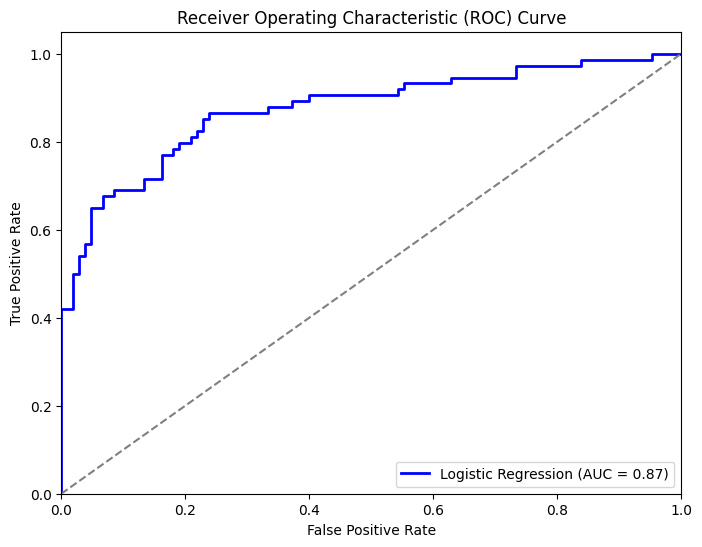

In [9]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the Logistic Regression model
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
